<a href="https://colab.research.google.com/github/natthanich/Project_Deep_Tooth/blob/main/Regress6_Predict_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


In [4]:
import sys
sys.path.append('/content/drive/MyDrive/All_Data_Project/cut_panoramic/Model/Regression/6Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [5]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/All_Data_Project/cut_panoramic/Model/Regression/6Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')
height = width = model.input_shape[1]

In [6]:
df = pd.read_csv (f'/content/drive/MyDrive/All_Data_Project/cut_panoramic/Data/All_Re.csv')

In [7]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [8]:
DATA_PATH = "/content/drive/MyDrive/All_Data_Project/TVT_Gender"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/MyDrive/All_Data_Project/TVT_Gender/train
/content/drive/MyDrive/All_Data_Project/TVT_Gender/test


In [9]:
# base_dir = '/content/drive/MyDrive/TVT_Gender'
# os.makedirs(base_dir, exist_ok=True)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir, exist_ok=True)
# validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir, exist_ok=True)
# test_dir = os.path.join(base_dir, 'test')
# # os.makedirs(test_dir, exist_ok=True)

In [10]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Age(year)',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 2850 validated image filenames.


In [11]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,7,Y07F,1,V67.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
101,102,7,Y07F,1,Flip_V67.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
102,103,7,Y07F,1,V68.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
103,104,7,Y07F,1,Flip_V68.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
104,105,7,Y07F,1,V69.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
...,...,...,...,...,...,...,...,...
4745,121,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4746,122,25,Y25M,19,J464.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4747,123,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4748,124,25,Y25M,19,J465.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both


In [12]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
predict_image(path[0])[0]

1/1 [==============================] - 10s 10s/step


7.252616

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 25ms/step


In [16]:
pred_list

[7.252616,
 7.076055,
 7.0733376,
 7.0732913,
 7.0886016,
 7.075042,
 7.075552,
 7.0760136,
 7.1143928,
 7.0735755,
 7.1195936,
 7.0773425,
 7.0735984,
 7.073285,
 7.076942,
 7.0744457,
 7.0788674,
 7.074065,
 7.074498,
 7.074672,
 7.0766697,
 7.073316,
 7.073289,
 7.0732813,
 7.0744634,
 8.605122,
 8.242405,
 8.8720255,
 9.238224,
 9.228094,
 9.453369,
 9.410977,
 9.161715,
 7.202862,
 7.6737027,
 7.767399,
 7.8430967,
 9.215062,
 9.383418,
 8.284817,
 7.8081093,
 9.523025,
 9.400638,
 9.0767975,
 8.98022,
 9.581839,
 9.818926,
 7.3546724,
 7.1164865,
 9.107646,
 9.29873,
 9.799825,
 8.834368,
 8.562608,
 9.914682,
 9.622351,
 8.879219,
 9.38981,
 9.485191,
 9.494938,
 8.86854,
 8.715775,
 9.229563,
 9.243075,
 9.291632,
 9.0617485,
 8.914325,
 9.239717,
 9.301317,
 8.837612,
 8.823768,
 9.644858,
 9.159339,
 8.527103,
 8.853675,
 9.817762,
 9.869537,
 9.733455,
 10.21864,
 10.318813,
 9.09922,
 8.834927,
 8.514501,
 9.038269,
 9.971474,
 10.424365,
 9.139289,
 9.108011,
 9.894184,
 1

In [17]:
print(type(pred_list))

<class 'list'>


In [18]:
pred_int = np.around(pred_list)

In [19]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [20]:
pred

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  9.,
        8.,  9.,  9.,  9.,  9.,  9.,  9.,  7.,  8.,  8.,  8.,  9.,  9.,
        8.,  8., 10.,  9.,  9.,  9., 10., 10.,  7.,  7.,  9.,  9., 10.,
        9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,  9.,  9., 10., 10., 10.,
       10., 10.,  9.,  9.,  9.,  9., 10., 10.,  9.,  9., 10., 10., 10.,
        9.,  8.,  8., 10.,  9.,  8.,  8., 10., 10., 10., 10., 10., 10.,
       10., 10., 10.,  9.,  9., 10., 10., 10., 12., 11., 11., 10., 11.,
       10., 10., 11., 11., 12., 12., 12., 12., 11., 12., 11., 11., 10.,
       11., 11., 12., 12., 11., 11., 11., 12., 12., 12., 12., 11., 11.,
       11., 11., 12., 12., 11., 11., 12., 13., 12., 12., 12., 13., 13.,
       10., 10., 14., 13., 12., 12., 13., 13., 12., 12., 11., 12., 14.,
       12., 12., 13., 12., 13., 12., 14., 12., 12., 16., 14., 14

#confusion_matrix

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 27.473684210526315%
              precision    recall  f1-score   support

           7       0.85      1.00      0.92        50
           8       0.56      0.28      0.37        50
           9       0.43      0.74      0.54        50
          10       0.31      0.42      0.36        50
          11       0.31      0.34      0.33        50
          12       0.26      0.44      0.33        50
          13       0.27      0.26      0.26        50
          14       0.16      0.16      0.16        50
          15       0.20      0.18      0.19        50
          16       0.21      0.16      0.18        50
          17       0.23      0.14      0.17        50
          18       0.23      0.16      0.19        50
          19       0.19      0.16      0.17        50
          20       0.13      0.12      0.13        50
          21       0.09      0.08      0.09        50
          22       0.16      0.06      0.09        50
          23       0.15      0.52      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

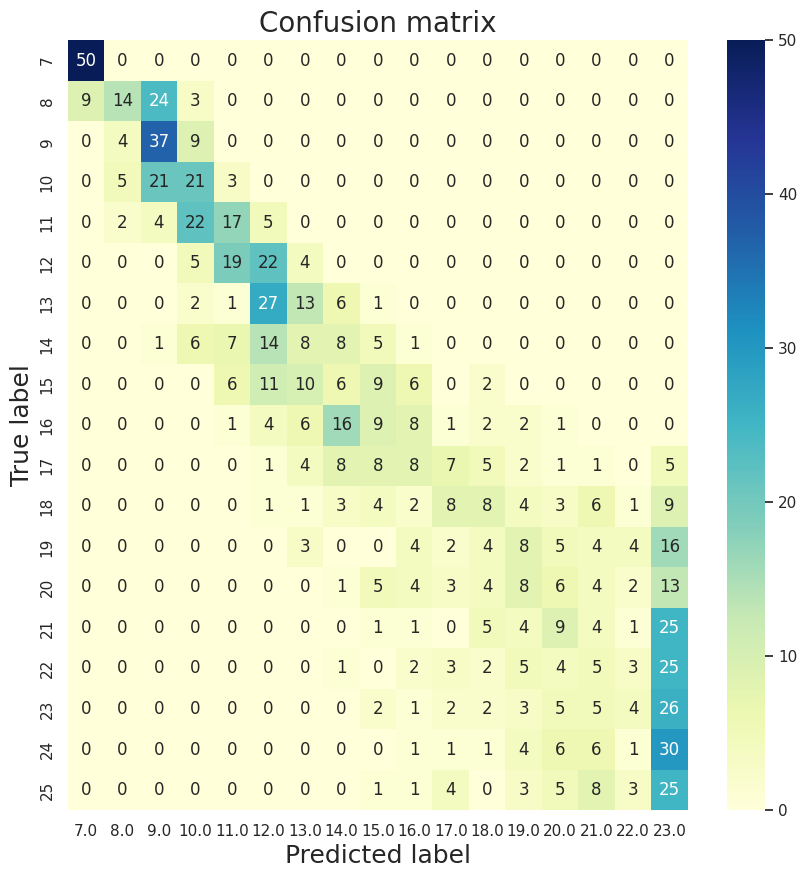

In [22]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [23]:
# from sklearn import metrics

#MSE and MAE

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mse = mean_squared_error(act,pred)
print("MSE:",mse)

MSE: 5.422105263157895


In [25]:
mae = mean_absolute_error(act,pred)
print("MAE:",mae)


MAE: 1.628421052631579


In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.628421052631579
MSE: 5.422105263157895
RMSE: 2.328541445445602
